## analiza Logistic Regression dla danych

In [1]:
%load_ext autoreload
%autoreload 2
random_state = 42
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [5]:
# wybrany wczesniej vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=7, max_df=0.7)

## szukamy hiperparametrów

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state, stratify=data['fake'])

vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state=random_state, max_iter=1000)

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(lr_model, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train_vec, y_train)

print("\nNajlepsze parametry:")
print(grid_search.best_params_)

print("\nNajlepszy wynik F1-score (na walidacji krzyżowej):")
print(f"{grid_search.best_score_:.4f}")

print("\nOcena na zbiorze testowym:")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Najlepsze parametry:
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Najlepszy wynik F1-score (na walidacji krzyżowej):
0.5678

Ocena na zbiorze testowym:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1948
           1       0.58      0.56      0.57      1941

    accuracy                           0.58      3889
   macro avg       0.58      0.58      0.58      3889
weighted avg       0.58      0.58      0.58      3889



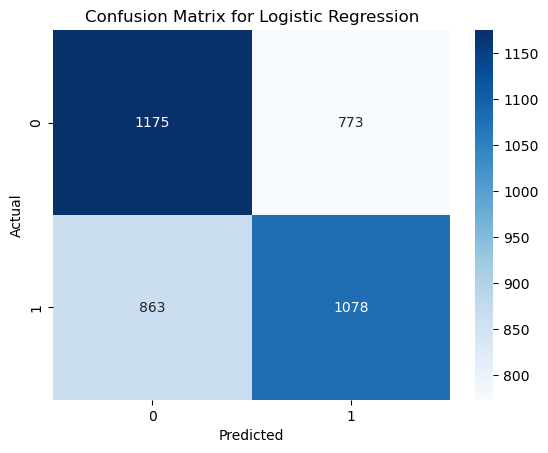

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")

Accuracy: 0.5793
Precision: 0.5824
